In [122]:
import re
from collections import defaultdict

from matplotlib import pyplot as plt

from anki import Collection

In [264]:
col = Collection('/home/eahn/.local/share/Anki2/Eric/collection.anki2')

In [265]:
def is_hanzi(c):
    return len(c) == 1 and 0x4e00 <= ord(c) <= 0x9fff

In [266]:
def create_freq_map(search_string, hanzi_field):
    h2s = defaultdict(list)
    s2h = {}
    for nid in col.findNotes(search_string):
        note = col.getNote(nid)
        hanzis = set(filter(is_hanzi, note[hanzi_field]))
        s2h[nid] = hanzis
        for hanzi in hanzis:
            h2s[hanzi].append(nid)
    return dict(h2s), s2h

In [267]:
def cumulative(hanzis, h2s, s2h):
    result = []
    counts = {s: len(h) for s, h in s2h.items()}
    current = 0
    for hanzi in hanzis:
        if hanzi in h2s:
            for nid in h2s[hanzi]:
                counts[nid] -= 1
                if counts[nid] == 0:
                    current += 1
        result.append(current / len(s2h))
    return result

In [268]:
spoon_h2s, spoon_s2h = create_freq_map('deck:Mandarin::"Spoon Fed"', 'Hanzi')
grammar_h2s, grammar_s2h  = create_freq_map('deck:Mandarin::"Grammar Wiki" note:"Chinese Grammar Wiki"', '中文')

In [269]:
my_hanzi = []
for nid in col.findNotes('deck:Mandarin::Heisig card:Reading'):
    note = col.getNote(nid)
    hanzi = note['Hanzi']
    if is_hanzi(hanzi):
        my_hanzi.append(hanzi)
up_to = my_hanzi.index('沾')

Grammar


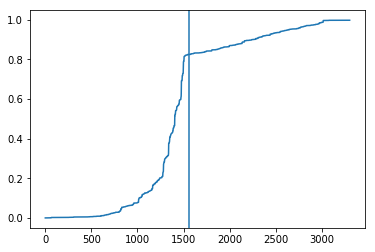

Spoon Fed


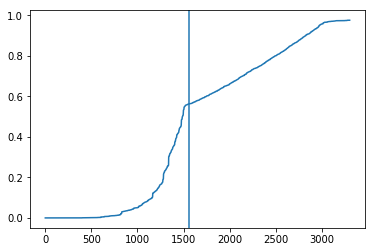

In [270]:
for name, h2s, s2h in (('Grammar'  , grammar_h2s, grammar_s2h),
                       ('Spoon Fed', spoon_h2s,   spoon_s2h)):
    print(name)
    x = cumulative(my_hanzi, h2s, s2h)
    plt.plot(x)
    plt.axvline(up_to)
    plt.show()

In [271]:
def greedy(hanzis, h2s, s2h, up_to=0):
    counts = {s: len(h) for s, h in s2h.items()}
    current = 0
    for hanzi in hanzis[:up_to + 1]:
        if hanzi in h2s:
            for nid in h2s[hanzi]:
                counts[nid] -= 1
                if counts[nid] == 0:
                    current += 1
    new = set(hanzis[up_to + 1:])
    print(current)
    while new:
        max_contrib = -1
        for hanzi in new:
            if hanzi not in h2s:
                continue
            contrib = sum((1 - counts[s] / len(s2h[s]))**2 for s in h2s[hanzi])
            if contrib > max_contrib:
                max_contrib = contrib
                best_hanzi = hanzi
        if max_contrib == -1:
            break
        print(best_hanzi, max_contrib)
        new -= {best_hanzi}
        for nid in h2s[best_hanzi]:
            counts[nid] -= 1

In [272]:
greedy(my_hanzi, spoon_h2s, spoon_s2h, up_to)

4576
杨 17.71251657863941
偷 17.266518208091846
祝 16.88000133296738
累 16.076935232072806
咖 16.066944657166935
啡 22.434570409872187
签 15.942575816464482
迟 15.79227441780202
款 14.949138692896808
羞 14.824835865092899
穷 14.42815475019209
绍 14.238843723038906
邮 14.095677982931772
污 13.75441685127874
辆 13.44620852967194
挑 13.409082217809324
聪 12.428228530928749
刘 12.003549141955528
拍 11.728082032012894
妻 11.442410670037836
权 11.235579567130308
奥 11.051016450465335
戒 10.975498866213155
苹 10.864756393298062
毕 10.771518293707564
歉 10.579834054356615
秘 10.447533487952029
丢 10.342943751574705
访 10.26969445147205
韩 10.256180555555558
币 10.244169298439457
墙 10.181696304937647
奖 10.149658904214766
乘 9.835425049630011
诺 9.792159170903345
啤 9.699841342720132
伦 9.689694720731497
敦 11.483501669005962
朱 9.684967633977376
赢 9.44000242322212
藏 9.42855262121267
庆 9.264230799681027
刷 9.215392573696146
扰 9.206446736693312
暖 9.18113677878559
猫 9.15828860002832
郑 9.126705089443185
寓 9.069317433356362
爬 8.91659375

蜗 1.429138321995465
陶 1.429138321995465
浆 1.429138321995465
薯 1.4056250000000001
桶 1.4056250000000001
砸 1.4056250000000001
狠 1.4056250000000001
钩 1.4056250000000001
皱 1.4056250000000001
撑 1.4056250000000001
篷 1.4500000000000002
嫩 1.4056250000000001
芽 1.4500000000000002
锦 1.4041153651543263
猴 1.4027777777777777
狼 1.3969444444444448
捉 1.3950617283950617
慌 1.3889462809917354
炭 1.388888888888889
伐 1.388888888888889
扯 1.388888888888889
熏 1.388888888888889
瞎 1.388888888888889
踩 1.388888888888889
铲 1.3746938775510207
挡 1.3746938775510207
摘 1.3746938775510207
阻 1.3746938775510207
怒 1.3725
氛 1.3725
乳 1.3669444444444445
鲸 1.445216049382716
哺 1.5557484567901234
漏 1.3526234567901234
鉴 1.3526234567901234
扒 1.3526234567901234
匪 1.3526234567901234
缠 1.3526234567901234
绷 1.4056250000000001
扶 1.3526234567901234
颈 1.3396321491559589
舰 1.3396321491559589
艇 1.484567901234568
辽 1.3366503626243884
阔 1.4693877551020411
乖 1.3344444444444448
耕 1.3344444444444448
壶 1.3344444444444448
锐 1.3344444444444448
晕 1.33

In [222]:
greedy(my_hanzi, grammar_h2s, grammar_s2h, up_to)

3091
咖 18.441181740429993
啡 24.696395446207507
迟 17.40123638451836
累 17.105625592700438
聪 14.000474915510702
舒 12.646878101539473
挺 12.259275081435312
凭 9.528958564326327
宁 9.13885623584946
亏 9.12721253366228
宜 8.834927991303907
澡 8.266592728459612
脏 7.887992297001626
饿 7.226133786848074
嘛 7.029794607849262
猫 6.889196574329151
啤 6.8306719665215345
毕 6.783178539934492
赢 6.738373032084329
纽 6.549996535471066
闹 5.883701338158122
碗 5.198805699794711
骗 5.045777229147194
陪 5.010302973041068
糕 5.004930737191227
丢 4.738658611556547
偷 4.690520080581252
爷 4.503793028785589
扔 4.221036857963265
爬 4.145997684211336
趁 4.133812600158342
邮 4.03244137628753
笨 3.9961603710111495
堵 3.9650868055555555
伞 3.6996527777777777
拍 3.6591119547563107
醉 3.6103194627072837
刷 3.573640158542756
遍 3.5728810500234953
赚 3.4664796363818215
扰 3.44800673437521
污 3.429852604220102
瓶 3.223239653356412
腊 3.178911435891828
债 3.1666509241864427
滩 3.124940791131267
躺 3.121304012345679
甜 3.103262184868079
译 3.0904706790123457
湿 3